# Домашнее задание 3. Анализ данных

Задание выполнил(а):

    Миронов Павел Владимирович

# Часть I

Каждое задание в этой части оценивается в 0,15 баллов. Всего за выполнение этой части можно получить 2,55 балла.

In [40]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:

DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [5]:
try:
    data = pd.read_csv(DIABETS)
except:
    data = pd.read_csv("./pima_indians_diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [9]:
for column in data.columns:
    k = data[column].isna().sum()
    if k > 0:
        print(f"В переменной {column} {k} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [12]:
# Дискретные признаки
for column in "Glucose BloodPressure SkinThickness Insulin".split():
    # data[column].fillna(data[column].median(), inplace=True)
    data.fillna({column: data[column].median()}, inplace=True)

# Непрерывный признак
# data["BMI"].fillna(data["BMI"].mean(), inplace=True)
data.fillna({"BMI": data[column].median()}, inplace=True)

## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Задание 4

У скольких женщин строго старше 50 лет обнаружен диабет?

In [20]:
int(((data['Age'] > 50) & (data['Class'] == 1)).sum())

38

## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [21]:
data.sort_values(by='Pregnancies', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
455,14,175.0,62.0,30.0,125.0,33.6,0.212,38,1


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [22]:
int(((data['Age'] >= 30) & (data['Age'] <= 40) & (data['Pregnancies'] >= 3)).sum())

142

## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [29]:
# способ, который первый пришёл в голову:
print(round(((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)).sum() / len(data) * 100, 2))

# способ поприкольнее
print(round(((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)).mean() * 100, 2))

18.88
18.88


## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [31]:
int(((data['BMI'] >= 30) & (data['BloodPressure'] > 89)).sum())

45

## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [35]:
# Glucose ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Средний уровень глюкозы у людей с диабетом:", float(data.loc[data['Class'] == 1, 'Glucose'].mean()))
print("Средний уровень глюкозы у людей без диабета:", float(data.loc[data['Class'] == 0, 'Glucose'].mean()))

Средний уровень глюкозы у людей с диабетом: 142.13059701492537
Средний уровень глюкозы у людей без диабета: 110.682


Сначала хотел удивиться таким значениям, а потом понял, что единицы измерения западные - в mg/dL. Тогда всё правдоподобно.

In [37]:
# BloodPressure ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Среднее давление у людей с диабетом:", float(data.loc[data['Class'] == 1, 'BloodPressure'].mean()))
print("Среднее давление у людей без диабета:", float(data.loc[data['Class'] == 0, 'BloodPressure'].mean()))

Среднее давление у людей с диабетом: 75.1231343283582
Среднее давление у людей без диабета: 70.92


In [39]:
# Insulin ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。
print("Средний уровень инсулина в крови у людей с диабетом:", float(data.loc[data['Class'] == 1, 'Insulin'].mean()))
print("Средний уровень инсулина в крови у людей без диабета:", float(data.loc[data['Class'] == 0, 'Insulin'].mean()))

Средний уровень инсулина в крови у людей с диабетом: 164.70149253731344
Средний уровень инсулина в крови у людей без диабета: 127.792


## Задание 10

Постройте гистограммы для любых двух количественных признаков.

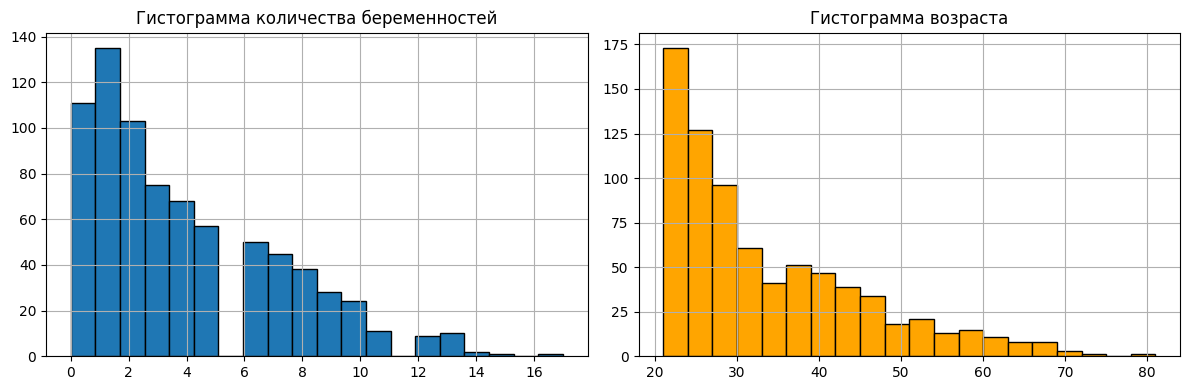

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

data['Pregnancies'].hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title('Гистограмма количества беременностей')
axes[0].set_xticks(range(int(data['Pregnancies'].min()), int(data['Pregnancies'].max()) + 1, 2))  # шаг 2

data['Age'].hist(ax=axes[1], bins=20, edgecolor='black', color='orange')
axes[1].set_title('Гистограмма возраста')

plt.tight_layout()
plt.show()

## Задание 11

Постройте круговую диаграмму для признака __Class__.

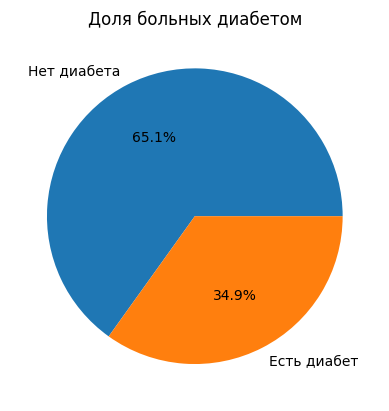

In [58]:
(data['Class'].value_counts()
 .rename(index={0: 'Нет диабета', 1: 'Есть диабет'})
 .plot.pie(autopct='%.1f%%'))

plt.title('Доля больных диабетом')
plt.ylabel('')
plt.show()

## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

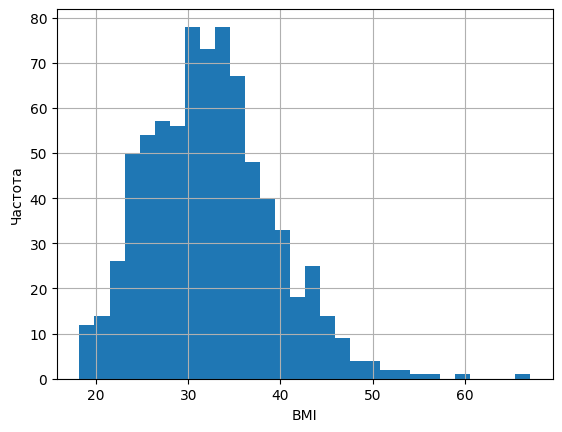

In [60]:
data['BMI'].hist(bins=30)
plt.xlabel('BMI')
plt.ylabel('Частота')
plt.show()

Распределение признака BMI смещено влево по сравнению с нормальным распределением. Возможно, в правой части распределения есть выбросы.

Постройте нормальное распределение поверх графика.

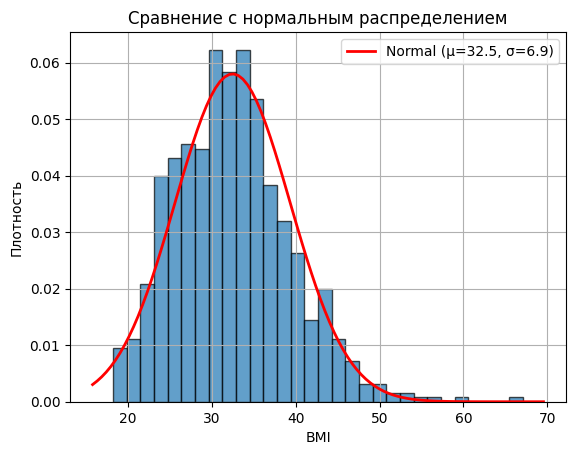

In [64]:
import numpy as np
import scipy.stats as stats

# Гистограмма
data['BMI'].hist(bins=30, density=True, alpha=0.7, edgecolor='black')

# Нормальная кривая
mu, std = data['BMI'].mean(), data['BMI'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.title('Сравнение с нормальным распределением')
plt.legend()
plt.show()

## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

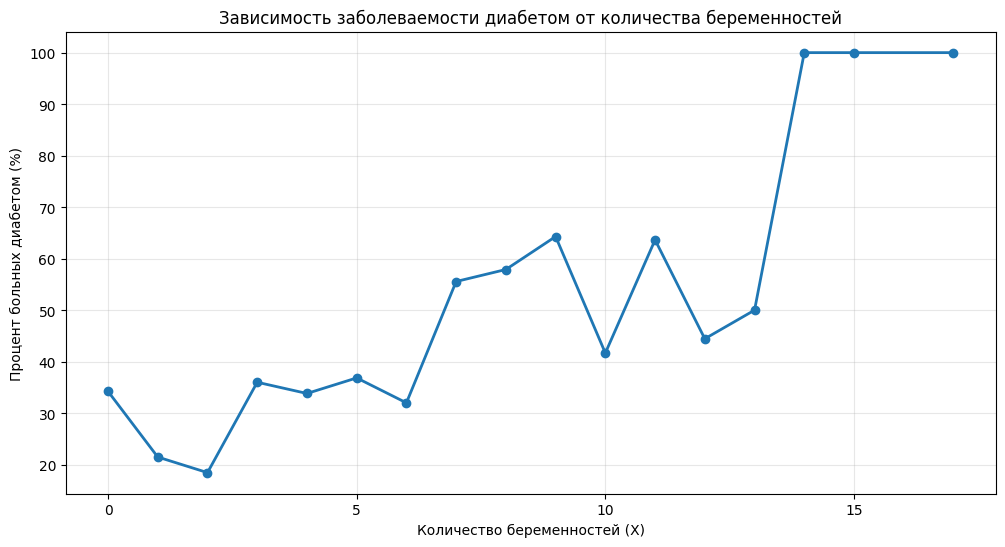

<Figure size 1000x600 with 0 Axes>

In [76]:
table = data.groupby('Pregnancies')['Class'].agg([
    ('Количество_больных', 'sum'),
    ('Общее_количество', 'count'),
    ('Процент_больных_%', lambda x: round(x.mean() * 100, 2))
]).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(table['Pregnancies'], table['Процент_больных_%'], 
         marker='o', linestyle='-', linewidth=2)

plt.xlabel('Количество беременностей (X)')
plt.ylabel('Процент больных диабетом (%)')
plt.title('Зависимость заболеваемости диабетом от количества беременностей')
plt.grid(alpha=0.3)
plt.xticks(range(int(table['Pregnancies'].min()), int(table['Pregnancies'].max()) + 1, 5))
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [80]:
data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [82]:
print("Процент больных диабетом среди женщин, которые были беременны:", round(((data['Class'] == 1) & (data['wasPregnant'] == 1)).mean() * 100, 2))
print("Процент больных диабетом среди женщин, которые не были беременны:", round(((data['Class'] == 1) & (data['wasPregnant'] == 0)).mean() * 100, 2))

Процент больных диабетом среди женщин, которые были беременны: 29.95
Процент больных диабетом среди женщин, которые не были беременны: 4.95


## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [85]:
data['bodyType'] = pd.cut(data['BMI'], 
                          bins=[-np.inf, 18.5, 25, 30, np.inf], 
                          labels="Underweight, Normal weight, Overweight, Obesity".split(", "), 
                          include_lowest=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [87]:
condition = (data['bodyType'] == 'Normal weight') & (data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)
print('Процент "здоровых" женщин, больных диабетом:', (data.loc[condition, 'Class'] == 1).mean() * 100)

Процент "здоровых" женщин, больных диабетом: 10.0


# Часть II

Каждое задание в этой части оценивается в 1,15 баллов. Всего за выполнение этой части можно получить 3,45 балла.

In [ ]:
babies = pd.read_csv(BABIES, index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

## Часть III

Каждое задание в этой части оценивается в 0,2 балла. Всего за выполнение этой части можно получить 4 балла.

Вам предлагается проанализировать датасет с Data - вакансиями.  
Скачайте его https://disk.yandex.ru/d/QUa3pCKVk48cAQ и считайте с помощью `pd.read_csv`.




In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

1. Выведите первые 5 и последние 5 строк датасета. Примените к датасету методы `info` и `describe`. Сколько в датасете строк и столбцов?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

2. Есть ли в датасете пропуски?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

3. Есть в датасете полные дубли? Если да, удалите их (метод drop_duplicates).

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

4. Сколько уникальных значений у переменной professional_roles?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

5. Сколько в датасете вакансий, не требующих опыта?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

6. Какое среднее количество навыков в вакансии? (переменная key_skills)

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

7. Какие валюты (ключ currency в поле salary) используются для заработной платы? Создайте столбец currency.  
*Подсказка. Как вариант, можете воспользоваться функцией eval, которая исполняет код, написанный в строке. Для проверки на NaN можете использовать pd.isnull()*

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

8. Какая компания лидирует по количеству вакансий?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

9.  Какая компания лидирует по количеству вакансий с указанием заработной платы?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

10. Создайте столбец salary_num. Рассчитайте его, используя столбец salary. Если в это столбце указана вилка зарплаты, используйте среднее значение между from и to. Если указано только одно из значений (from или to, используйте его) **(2)**

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

11. Какая средняя заработная плата среди вакансий в рублях? А медианная заработная плата?  

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

12. Создайте столбец is_python_requirement, который принимает значение 1, если в key_skills присутствует python (учитывайте написание в любом регистре, а также вхождения подстроки python.).  Какой процент вакансий требует знания python?

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

13. Сгруппируйте по столбцам experience, schedule, employment, is_python_requirement (сразу по четырем столбцам). Найдите по каждой группе:
- количество опубликованных вакансий
- количество компаний, которые опубликовали вакансии
- среднюю заработную плату среди вакансий с указанием зарплаты в рублях


In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

14. Создайте столбец count_skills. В нём должна быть длина списка, который находит в столбце key_skills. Обратите внимание, что изначально столбец key_skills - строка, например, '[]' Подумайте, как превратить её в список и посчитать его длину.  

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

15. Создайте столбец len_descr, в котором должна быть длина описания (description) в символах без учета html тегов ("<...>"). Напишите для этого функцию get_len_descr.  Можете использовать регулярные выражения.
То есть, ваш код может выглядеть, например, так:

In [ ]:
import re

def get_len_descr(descr):
  clean_descr = re.sub( # ваш код
  # ваш код
  return len_descr

df['len_descr'] = df['description'].apply(# ваш код)

16. Постройте таблицу корреляций с тремя переменными: salary_num, len_descr, count_skills.  

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

17. Постройте тепловую карту из таблицы из предыдущего пункта.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

18. Какие скиллы чаще всего требуются? Выведите топ-10 требуемых скиллов.

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

19. Постройте гистограмму распределения зарплаты среди вакансий в рублях.  

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。

20. Постройте boxplot зарплаты (среди вакансий в рублях) с группировкой по полю experience

In [ ]:
# ( ͡° ͜ʖ ͡°)づ ━━ ✫・*。